In [1]:
import sys,os 
os.chdir('.\..\..')


In [2]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import PyQt5

In [3]:
train = pd.read_csv("./data_analysis/projekt1/classification/data.simple.train.100.csv")
test = pd.read_csv("./data_analysis/projekt1/classification/data.simple.test.100.csv")


In [4]:
X = train[['x', 'y']].values.T
print(X.shape)
Y = train.cls.values.reshape(1, len(train))
print(Y.shape)

(2, 100)
(1, 100)


In [5]:
Y == 1

array([[ True, False,  True,  True,  True,  True, False,  True, False,
         True, False,  True,  True,  True, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False,  True,  True, False,  True,  True,  True, False,
        False,  True, False, False, False,  True,  True,  True, False,
        False, False,  True,  True, False, False,  True,  True, False,
         True, False,  True, False, False, False, False,  True, False,
        False,  True,  True, False,  True,  True,  True, False, False,
         True, False,  True,  True, False,  True, False,  True,  True,
        False, False, False, False, False,  True,  True, False, False,
         True, False,  True,  True, False,  True, False, False, False,
         True]])

In [6]:
%matplotlib nbagg
%matplotlib notebook

In [7]:
%matplotlib tk

In [8]:
%matplotlib qt

In [4]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [11]:
plt.switch_backend('qt4agg')

In [7]:
plt.switch_backend('tkagg')

In [5]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [9]:
from IPython.display import HTML

In [7]:
plt.rcParams["animation.html"] = "html5"

In [8]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [18]:
nn_builder = nn.SequentialBuilder()
nn_builder.add_dense(2, 'relu')
nn_builder.add_dense(5, 'relu')
nn_builder.add_dense(1, 'sigmoid')
model = nn_builder.compile('binary_crossentropy', visualisation=True)

In [19]:
parameters, costs, animation = model.fit(X, Y == 1, num_epochs=10000)

Cost after epoch 0: 0.875134
Cost after epoch 1000: 0.214626
Cost after epoch 2000: 0.092222
Cost after epoch 3000: 0.108521
Cost after epoch 4000: 0.050453
Cost after epoch 5000: 0.089833
Cost after epoch 6000: 0.047857
Cost after epoch 7000: 0.049890
Cost after epoch 8000: 0.049239
Cost after epoch 9000: 0.041763


<Figure size 432x288 with 0 Axes>

In [ ]:
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

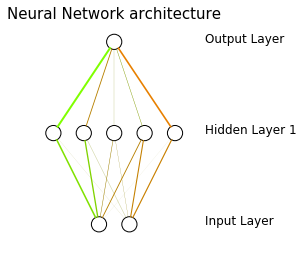

In [20]:
HTML(animation.to_html5_video())

In [14]:
x0, y0 = X[:, (Y == 1)[0]]
plt.scatter(x0, y0, c='red')
x1, y1 = X[:, (Y == 2)[0]]
plt.scatter(x1, y1, c='blue')
plt.show()

In [15]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    

In [16]:
plot_decision_boundary(lambda x: model.predict_classes(x.T) , X, Y)

In [17]:
p = model.predict_classes(X)

In [18]:
Y

array([[1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
        2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1]], dtype=int64)

In [19]:
p = (p[0] == False) +1
p

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1])

In [20]:
x2, y2 = X[:, (p == Y)[0]]
x3, y3 = X[:, (p != Y)[0]]
#plt.scatter(x0, y0, c='red')
#plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='red')

plt.show()

In [21]:
train1000 = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.train.100.csv")
test1000 = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.test.100.csv")
n = len(train1000)
X = train1000[['x', 'y']].values.T
Y = train1000.cls.values.reshape(1,-1) == 1
Xt = test1000[['x', 'y']].values.T
Yt = test1000.cls.values.reshape(1,-1) == 1

model2 = nn_builder.compile('binary_crossentropy')

x0, y0 = X[:, (Y == 0)[0]]
x1, y1 = X[:, (Y == 1)[0]]

x2, y2 = Xt[:, (Yt == 0)[0]]
x3, y3 = Xt[:, (Yt == 1)[0]]


model2.fit(X, (Y == 1), num_epochs=2000)

Cost after epoch 0: 0.574386
Cost after epoch 1000: 0.136167


({'W1': array([[ 1.34261415,  0.51214309],
         [ 0.1042704 , -1.44752613],
         [-0.20550107, -0.25734677],
         [-0.05862974, -0.43594898],
         [-0.0336124 , -0.30529433],
         [-0.95650932,  0.60855103],
         [ 0.74852857,  1.27596891],
         [ 0.0370289 , -0.34839624],
         [-0.36282754, -1.1137575 ],
         [ 0.69300268, -0.79724211],
         [-0.8810397 , -0.20216436],
         [ 1.07283617,  0.23274851],
         [-0.76680411, -0.53143043],
         [ 0.45832671, -0.05219735],
         [-0.58708432, -0.22839739],
         [ 0.66336701,  1.5430713 ],
         [-0.87906036, -0.42844443],
         [-0.5115529 , -1.7738843 ],
         [-0.7251221 , -0.754708  ],
         [ 0.83519183,  0.0562691 ],
         [-1.22466063,  0.42373396],
         [-0.24002459, -1.26407756],
         [-0.48091039, -0.45645656],
         [-0.7129846 , -0.11981961],
         [-1.64025207, -0.20707865],
         [ 0.84245204,  0.68508021],
         [ 0.92318769,  0.857669

In [22]:
plot_decision_boundary(lambda x: model2.predict_classes(x.T) , X, Y)